In [1]:
from exact_diag import form_basis, ham_op_2, quantum_operator, spinful_fermion_basis_1d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
l = 8
L = 2*l
N = l
Nfs = []
for i in range(N+1):
    if N-i <= L and i <= L:
        Nfs += [(i, N-i)]
big_basis = spinful_fermion_basis_1d(2*l, Nf = Nfs)
k = np.arange(1, 2*l+1, 2)*0.5*np.pi/l

def Sz(L, h, basis):
    h_dict = {'static': [['n|', [[.5*h, i] for i in range(L)]],
                        ['|n', [[-.5*h, i] for i in range(L)]]]}
    h_op = quantum_operator(h_dict, basis=basis)
    return h_op

In [3]:
Gs = np.arange(0., 3.5, .5)/np.sum(k)
hs = np.arange(0., 2.5, .5)
mags_full = np.zeros((len(Gs), len(hs)))
mags_T = np.zeros((len(Gs), len(hs)))
Sz_op = Sz(L, 1, big_basis)
for i, G in enumerate(Gs):
    H = ham_op_2(l, G, k, big_basis)
    Ht = ham_op_2(l, G, k, big_basis, couplings=(1,0,1))
    for j, h in enumerate(hs):
        h_op = Sz(L, h, big_basis)
        e, v = (H+h_op).eigsh(k=1, which='SA')
        mags_full[i, j] = Sz_op.matrix_ele(v[:,0], v[:,0])
        e, v = (Ht+h_op).eigsh(k=1, which='SA')
        mags_T[i, j] = Sz_op.matrix_ele(v[:,0], v[:,0])

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':
/Users/wholdhus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [4]:
import seaborn as sns

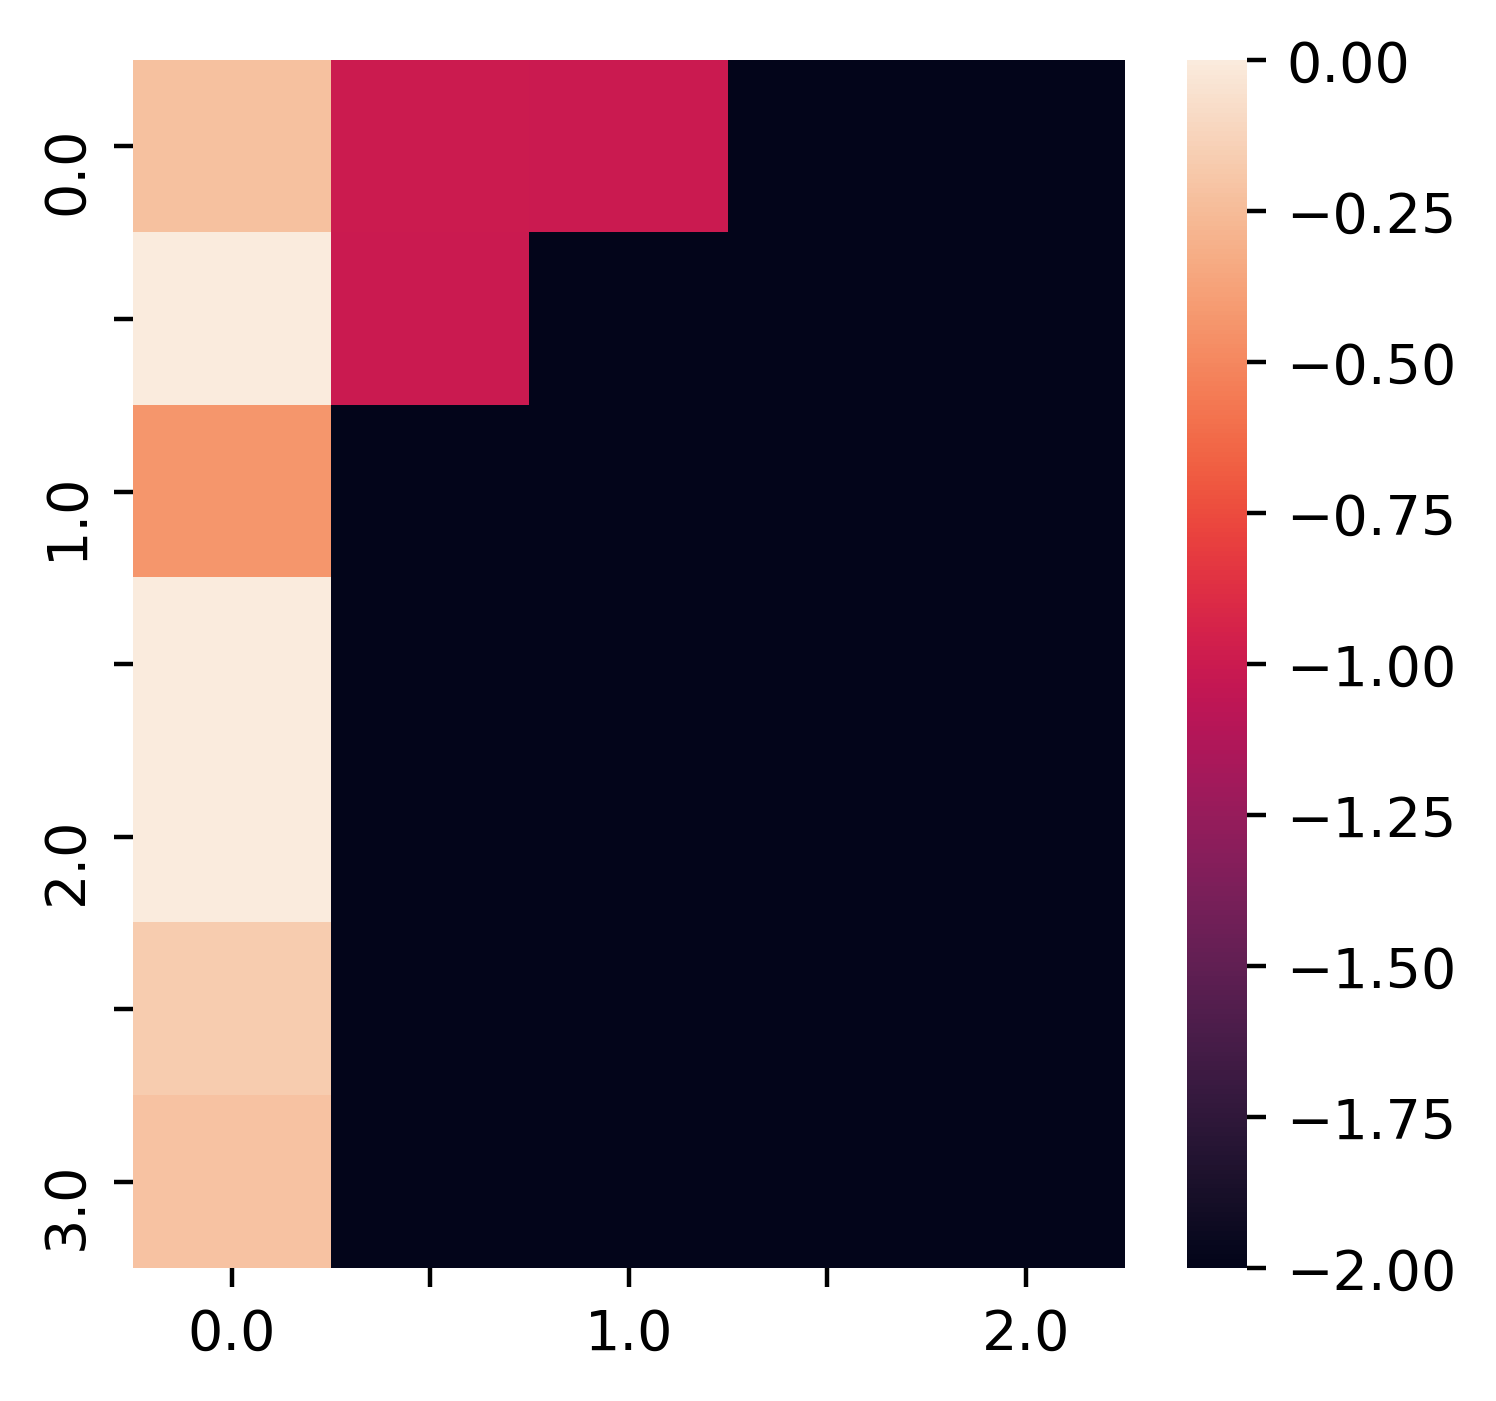

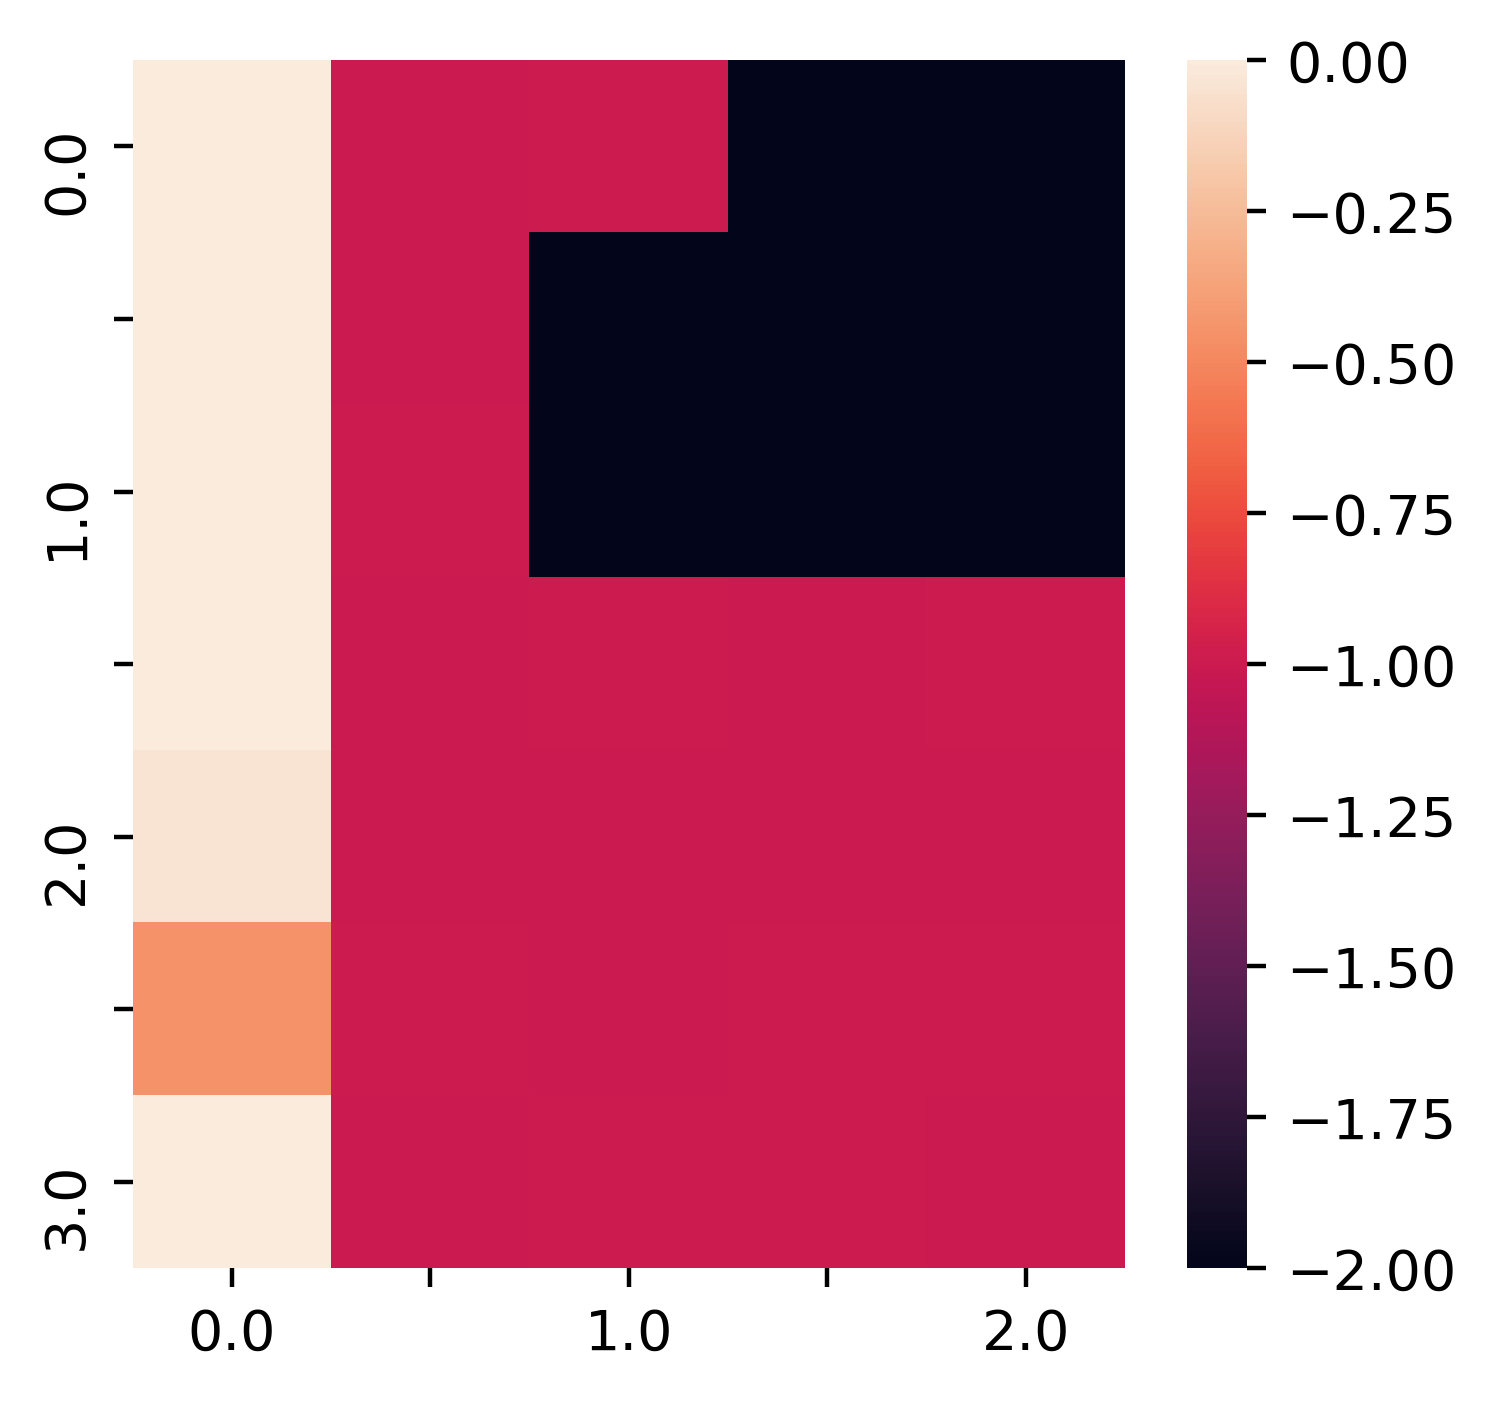

In [5]:
xlabels = [np.round(h, 1) for h in hs]
for i in range(len(xlabels)):
    if (i+1)%2 == 0:
        xlabels[i] = None
ylabels = [np.round(G*np.sum(k), 1) for G in Gs]
for i in range(len(ylabels)):
    if (i+1)%2 == 0:
        ylabels[i] = None
plt.figure(figsize=(4,4), dpi=400)
plot = sns.heatmap(mags_full, xticklabels=xlabels, yticklabels=ylabels, vmin=-2, vmax=0)
plt.show()
plt.figure(figsize=(4,4), dpi=400)
sns.heatmap(mags_T, xticklabels=xlabels, yticklabels=ylabels, vmin=-2, vmax=0)
plt.show()